In [7]:
import json

with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/gqa_ko.json", "r", encoding="utf-8") as f:
    gqa = json.load(f)
print("gqa", len(gqa))
    
with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/vg_ko.json", "r", encoding="utf-8") as f:
    vg = json.load(f)
print("vg", len(vg))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/ko_llava_instruct_150k.json", "r", encoding="utf-8") as f:
    ko_llava = json.load(f)
    for data in ko_llava:
        data["image"] = f"coco/train2017/{data['image']}"
print("ko_llava", len(ko_llava))
    
with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/llava_instruct_150k.json", "r", encoding="utf-8") as f:
    llava = json.load(f)
    for data in llava:
        data["image"] = f"coco/train2017/{data['image']}"
print("llava", len(llava))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/vqav2_okvqa.json", "r", encoding="utf-8") as f:
    vqav2 = json.load(f)
print("vqav2", len(vqav2))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/aokvqa.json", "r", encoding="utf-8") as f:
    aokvqa = json.load(f)
print("aokvqa", len(aokvqa))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/llava-ko-recap-120k.json", "r", encoding="utf-8") as f:
    llava_ko_recap = json.load(f)
print("llava_ko_recap", len(llava_ko_recap))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_food/llava_food_dataset_sample.json", "r", encoding="utf-8") as f:
    llava_food = json.load(f)
print("llava_food", len(llava_food))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_image/korean_image_multi_choice_conversation.json", "r", encoding="utf-8") as f:
    korean_image_multi_choice_conversation = json.load(f)
print("korean_image_multi_choice_conversation", len(korean_image_multi_choice_conversation))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_object/korean_object_captioning.json", "r", encoding="utf-8") as f:
    korean_object_captioning = json.load(f)
print("korean_object_captioning", len(korean_object_captioning))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_ocr_education/korean_ocr_education_sampled.json", "r", encoding="utf-8") as f:
    korean_ocr_education = json.load(f)
print("korean_ocr_education", len(korean_ocr_education))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_visualization_qa/korean_visualization_qa_train.json", "r", encoding="utf-8") as f:
    korean_visualization_qa_train = json.load(f)
print("korean_visualization_qa_train", len(korean_visualization_qa_train))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_text_in_the_wild_ocr/text_in_the_wild_final.json", "r", encoding="utf-8") as f:
    text_in_the_wild = json.load(f)
print("text_in_the_wild", len(text_in_the_wild))

with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/ko_instruct.json", "r", encoding="utf-8") as f:
    ko_instruct = json.load(f)
print("ko_instruct", len(ko_instruct))

gqa 72140
vg 86417
ko_llava 156564
llava 157712
vqav2 91781
aokvqa 66160
llava_ko_recap 119717
llava_food 300
korean_image_multi_choice_conversation 22766
korean_object_captioning 2364
korean_ocr_education 51485
korean_visualization_qa_train 28267
text_in_the_wild 98726
ko_instruct 21155


In [8]:
for data in gqa:
    data["conversations"][0]["value"] = data["conversations"][0]["value"].replace("<Answer> ", "")

In [9]:
data = gqa + vg + ko_llava + llava + aokvqa + vqav2 + llava_ko_recap + llava_food + korean_image_multi_choice_conversation + korean_object_captioning + korean_ocr_education + korean_visualization_qa_train + text_in_the_wild + ko_instruct

- General
    - LLava-Pretrain (En)
    - KoLLava-Pretrain (Ko)
    - GQA (Ko)
    - VG (Ko)
    - KoLLava-Instruct (Ko)
    - LLava-Instruct (En)
    - VQAv2(En)
    - OKVQA(En)
    - AOKVQA (En)
    - LLava-CC3M-Recap (Ko)
- Korean Culture
    - Korean Food (Ko)
    - Korean Landmark (Ko)
    - Korean Object (Ko)
    - Korean History (Ko)
- Korean OCR
    - Korean Visualization QA (Ko)
    - Korean Education OCR (Ko)
    - Text in the Wild (Ko)
- Language
    - KoAlpaca-Instruct (Ko)

In [10]:
len(data)

975554

In [11]:
with open("/home/aikusrv04/aiku/small_korean_vlm/data/llava_instruction_tuning/final_ko_llava_instruction_tuning.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [15]:
import os
import json
from tqdm import tqdm
from PIL import Image

def find_missing_or_invalid_images(json_path: str, base_path: str) -> list:
    """
    Checks if image files listed in a JSON file exist in the given base path.

    Args:
        json_path (str): Path to the JSON file.
        base_path (str): Base directory to be prepended to the "image" path in each item.

    Returns:
        list: A list of relative image paths that are missing.
    """
    missing_or_invalid_images = []
    new_data = []

    # Load the JSON data
    if json_path.endswith(".json"):
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    if json_path.endswith(".jsonl"):
        with open(json_path, "r", encoding="utf-8") as f:
            data = [json.loads(line) for line in f]
    print(f"Loaded {len(data)} items from {json_path}")
    # Check each image path
    for item in tqdm(data, total=len(data), desc="Checking images"):
        image_relative_path = item.get("image", "")
        image_relative_path = image_relative_path.split("/")[-1].strip()
        image_full_path = os.path.join(base_path, image_relative_path)
 
        if not os.path.exists(image_full_path):
            missing_or_invalid_images.append(image_relative_path)
            continue
        
        # Try to open and verify the image
        try:
            with Image.open(image_full_path) as img:
                img.verify()  # verify doesn't load full image but checks integrity
                new_data.append(item)
                
            
        except Exception as e:
            #print(f"Invalid image {image_relative_path}: {e}")
            missing_or_invalid_images.append(image_relative_path)
            
        # Copy image to destination path


    return missing_or_invalid_images, new_data


In [17]:
json_path = "/home/aikusrv04/aiku/small_korean_vlm/data/korean_text_in_the_wild_ocr/text_bbox_output_final.json"
base_directory = "/home/aikusrv04/aiku/small_korean_vlm/data/korean_text_in_the_wild_ocr/new_benchmark_images"
missing_or_corrupt, _ = find_missing_or_invalid_images(json_path, base_directory)
if missing_or_corrupt:
    print("Missing or invalid images:")
    #for img in missing_or_corrupt:
    #   print(img)
    print(f"Total missing or invalid images: {len(missing_or_corrupt)}")
else:
    print("All images exist and are valid.")


Loaded 4000 items from /home/aikusrv04/aiku/small_korean_vlm/data/korean_text_in_the_wild_ocr/text_bbox_output_final.json


Checking images: 100%|██████████| 4000/4000 [00:00<00:00, 7647.37it/s]

All images exist and are valid.


In [2]:
json_path = "/home/aikusrv04/aiku/small_korean_vlm/data/korean_image/val/val_multichoice_conversation.json"
base_directory = "/home/aikusrv04/aiku/small_korean_vlm/data"
missing_or_corrupt, new_data = find_missing_or_invalid_images(json_path, base_directory)
if missing_or_corrupt:
    print("Missing or invalid images:")
    for img in missing_or_corrupt:
        print(img)
    print(f"Total missing or invalid images: {len(missing_or_corrupt)}")
    print(f"Total valid items: {len(new_data)}")
else:
    print("All images exist and are valid.")


Loaded 2655 items from /home/aikusrv04/aiku/small_korean_vlm/data/korean_image/val/val_multichoice_conversation.json


Checking images: 100%|██████████| 2655/2655 [00:02<00:00, 1103.94it/s]

All images exist and are valid.


In [21]:
import json
with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_image/koreanimagetext_single_conversation.json", "r", encoding="utf-8") as f:
    koreanimagetext = json.load(f)
new_data = []
for data in koreanimagetext:
    if data["conversations"][1]["value"] == "":
        print("Empty conversation found, skipping this entry.")
        continue
    if data["conversations"][1]["value"][-1] != ".":
        data["conversations"][1]["value"] += "."
    new_data.append(data)
with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_image/koreanimagetext_single_conversation_1.json", "w", encoding="utf-8") as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)

Empty conversation found, skipping this entry.


In [2]:
import json
with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_image/val/val_multichoice_conversation_hyperclovax_total.jsonl", "r") as f:
    data = [json.loads(line) for line in f]
    
is_correct = []
for item in data:
    if item["output"] == "":
        is_correct.append(0)
        continue
    if item["conversations"][-1]["value"] == item["output"][0]:
        is_correct.append(1)
    else:
        is_correct.append(0)
#print(f"Accuracy: {is_correct / len(data) * 100:.2f}%")
print(f"Accuracy: {sum(is_correct) / len(is_correct) * 100:.2f}%")

Accuracy: 89.53%


In [4]:
import json

with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_visualization_qa/val/json/annotation_reduced.json", "r", encoding="utf-8") as f:
    data = json.load(f)
new_data = []
for item in data:
    for i in range(0, len(item["conversations"]), 2):
        new_data.append({
            "id": item["id"],
            "image": item["image"],
            "conversations": [
                {
                    "from": "human",
                    "value": item["conversations"][i]["value"] + " 한 문장으로 대답해주세요."
                },
                {
                    "from": "gpt",
                    "value": item["conversations"][i + 1]["value"]
                }
            ]
        })
with open("/home/aikusrv04/aiku/small_korean_vlm/data/korean_visualization_qa/val/json/annotation_reduced_1.json", "w", encoding="utf-8") as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)
        

- General
    - LLava-Pretrain (En)
    - KoLLava-Pretrain (Ko)
    - GQA (Ko)
    - VG (Ko)
    - KoLLava-Instruct (Ko)
    - LLava-Instruct (En)
    - VQAv2(En)
    - OKVQA(En)
    - AOKVQA (En)
    - LLava-CC3M-Recap (Ko)
- Korean Culture
    - Korean Food (Ko)
    - Korean Landmark (Ko)
    - Korean Object (Ko)
    - Korean History (Ko)
- Korean OCR
    - Korean Visualization QA (Ko)
    - Korean Education OCR (Ko)
    - Text in the Wild (Ko)
- Language
    - KoAlpaca-Instruct (Ko)

/tmp/ipykernel_1962088/3516704242.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


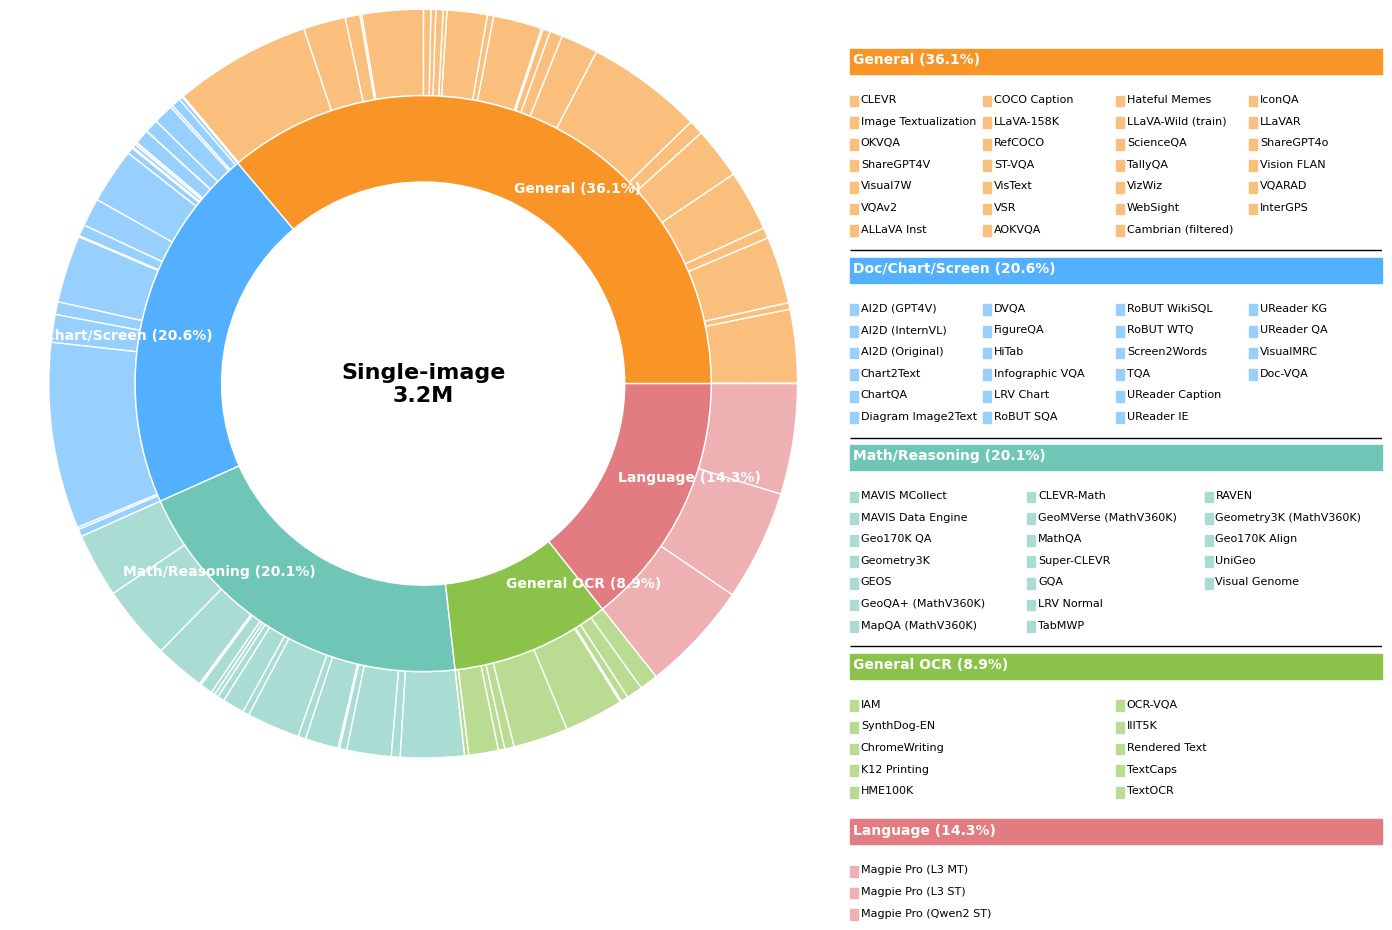

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys
from matplotlib.patches import Rectangle

# Function to lighten colors for legend bullets
def lighten_color(color, amount=0.6):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = mcolors.to_rgb(c)
    h, l, s = colorsys.rgb_to_hls(*c)
    l = 1 - amount * (1 - l)
    return colorsys.hls_to_rgb(h, l, s)

# Dataset definitions (in K)
dataset_info = {
    'General': {
        'CLEVR': 0.7, 'Image Textualization': 99.6, 'OKVQA': 9.0,
        'ShareGPT4V': 91.0, 'Visual7W': 14.4, 'VQAv2': 82.8,
        'ALLaVA Inst': 70.0, 'COCO Caption': 20.0, 'LLaVA-158K': 158.0,
        'RefCOCO': 50.6, 'ST-VQA': 17.2, 'VisText': 10.0, 'VSR': 2.2,
        'AOKVQA': 66.2, 'Hateful Memes': 8.5, 'LLaVA-Wild (train)': 54.5,
        'ScienceQA': 5.0, 'TallyQA': 9.9, 'VizWiz': 6.6, 'WebSight': 10.0,
        'Cambrian (filtered)': 83.1, 'IconQA': 2.5, 'LLaVAR': 20.0,
        'ShareGPT4o': 57.3, 'Vision FLAN': 186.1, 'VQARAD': 0.3, 'InterGPS': 1.3
    },
    'Doc/Chart/Screen': {
        'AI2D (GPT4V)': 4.9, 'AI2D (InternVL)': 12.4, 'AI2D (Original)': 3.2,
        'Chart2Text': 27.0, 'ChartQA': 18.3, 'Diagram Image2Text': 0.3, 'DVQA': 20.0,
        'FigureQA': 1.0, 'HiTab': 2.5, 'Infographic VQA': 4.4, 'LRV Chart': 1.8,
        'RoBUT SQA': 8.5, 'RoBUT WikiSQL': 75.0, 'RoBUT WTQ': 38.2,
        'Screen2Words': 15.7, 'TQA': 1.4, 'UReader Caption': 91.4,
        'UReader IE': 17.3, 'UReader KG': 37.6, 'UReader QA': 252.9,
        'VisualMRC': 3.0, 'Doc-VQA': 10.2
    },
    'Math/Reasoning': {
        'MAVIS MCollect': 87.4, 'MAVIS Data Engine': 100.0, 'Geo170K QA': 67.8,
        'Geometry3K': 2.1, 'GEOS': 0.5, 'GeoQA+ (MathV360K)': 17.2,
        'MapQA (MathV360K)': 5.2, 'CLEVR-Math': 5.3, 'GeoMVerse (MathV360K)': 9.3,
        'MathQA': 29.8, 'Super-CLEVR': 8.7, 'GQA': 72.1, 'LRV Normal': 10.5,
        'TabMWP': 45.2, 'RAVEN': 2.1, 'Geometry3K (MathV360K)': 9.7,
        'Geo170K Align': 60.3, 'UniGeo': 12.0, 'Visual Genome': 86.4
    },
    'General OCR': {
        'IAM': 5.7, 'SynthDog-EN': 40.1, 'ChromeWriting': 8.8, 'K12 Printing': 12.8,
        'HME100K': 74.5, 'OCR-VQA': 80.0, 'IIIT5K': 2.0, 'Rendered Text': 10.0,
        'TextCaps': 21.9, 'TextOCR': 25.1
    },
    'Language': {
        'Magpie Pro (L3 MT)': 150.0, 'Magpie Pro (L3 ST)': 150.0, 'Magpie Pro (Qwen2 ST)': 150.0
    }
}

category_colors = {
    'General': '#f99426',
    'Doc/Chart/Screen': '#52b0ff',
    'Math/Reasoning': '#70c6b6',
    'General OCR': '#8bc34a',
    'Language': '#e27c80'
}

# Create figure and donut axes
fig = plt.figure(figsize=(14, 8))
donut_ax = fig.add_axes([0.02, 0.05, 0.55, 0.9])
# Flatten for outer ring
outer_sizes = []
outer_colors = []
for cat, d in dataset_info.items():
    base = category_colors[cat]
    for _name, sz in d.items():
        outer_sizes.append(sz)
        outer_colors.append(lighten_color(base))
# Inner ring (categories)
inner_sizes = [sum(d.values()) for d in dataset_info.values()]
inner_colors = [category_colors[c] for c in dataset_info.keys()]
# Draw rings
donut_ax.pie(outer_sizes, radius=1.3, colors=outer_colors,
             wedgeprops=dict(width=0.3, edgecolor='white'))
cat_labels = [f"{c} ({sz/sum(inner_sizes)*100:.1f}%)" 
              for c, sz in zip(dataset_info.keys(), inner_sizes)]
donut_ax.pie(inner_sizes, radius=1.0, colors=inner_colors,
             labels=cat_labels, labeldistance=0.75,
             textprops=dict(color='white', weight='bold'),
             wedgeprops=dict(width=0.3, edgecolor='white'))
donut_ax.text(0, 0, "Single-image\n3.2M", ha='center', va='center',
              fontsize=16, weight='bold')
donut_ax.set(aspect='equal')

# ------ Legend panel ------
legend_ax = fig.add_axes([0.60, 0.05, 0.38, 0.9])
legend_ax.axis('off')

total = sum(inner_sizes)
y = 0.96  # start at top of legend_ax
for cat, items in dataset_info.items():
    # Header bar
    pct = sum(items.values()) / total * 100
    legend_ax.add_patch(Rectangle((0, y-0.03), 1, 0.035, transform=legend_ax.transAxes,
                                 color=category_colors[cat], clip_on=False))
    legend_ax.text(0.005, y-0.01, f"{cat} ({pct:.1f}%)", transform=legend_ax.transAxes,
                   va='center', ha='left', color='white', weight='bold', fontsize=10)
    # Items in multiple columns
    entries = list(items.items())
    n = len(entries)
    # decide number of columns: more items -> more columns
    ncols = min(4, (n // 7) + 1)
    rows = (n + ncols - 1) // ncols
    xs = [i/ncols for i in range(ncols)]
    for i, (name, sz) in enumerate(entries):
        col = i // rows
        row = i % rows
        x = xs[col]
        y_item = y - 0.06 - row*0.03
        # bullet square
        legend_ax.add_patch(Rectangle((x, y_item-0.015), 0.015, 0.015, transform=legend_ax.transAxes,
                                     color=lighten_color(category_colors[cat]), clip_on=False))
        # text label
        legend_ax.text(x+0.02, y_item-0.005, f"{name}", transform=legend_ax.transAxes,
                       va='center', ha='left', fontsize=8)
    # move y down for next category and draw separator
    y = y - 0.06 - rows*0.03 - 0.02
    legend_ax.hlines(y+0.015, xmin=0, xmax=1, transform=legend_ax.transAxes,
                     color='black', linewidth=1)

plt.tight_layout()
plt.show()


/tmp/ipykernel_1962088/2255146659.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


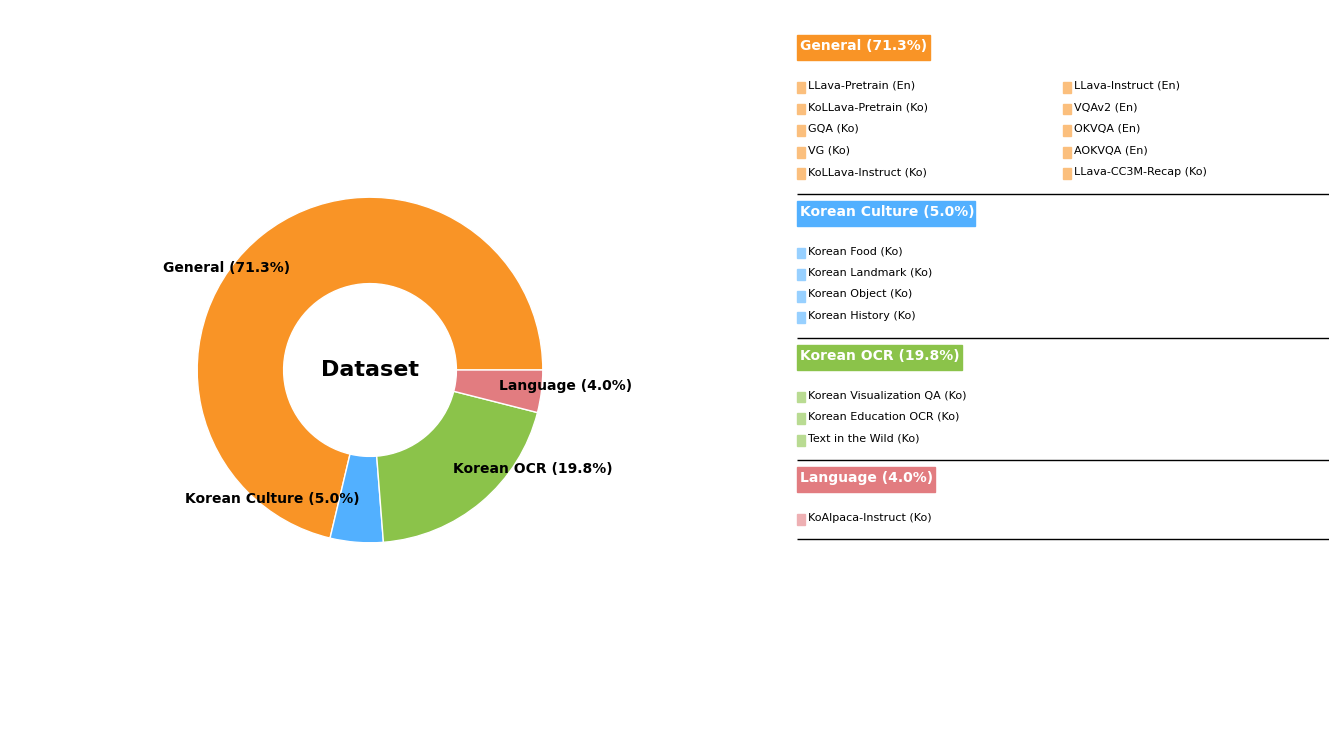

In [22]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys
from matplotlib.patches import Rectangle

# Function to lighten colors for legend bullets
def lighten_color(color, amount=0.6):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = mcolors.to_rgb(c)
    h, l, s = colorsys.rgb_to_hls(*c)
    l = 1 - amount * (1 - l)
    return colorsys.hls_to_rgb(h, l, s)

# Dataset structure with sizes only at super-category level
dataset_info = {
    'General': [
        'LLava-Pretrain (En)', 'KoLLava-Pretrain (Ko)', 'GQA (Ko)', 'VG (Ko)',
        'KoLLava-Instruct (Ko)', 'LLava-Instruct (En)', 'VQAv2 (En)',
        'OKVQA (En)', 'AOKVQA (En)', 'LLava-CC3M-Recap (Ko)'
    ],
    'Korean Culture': [
        'Korean Food (Ko)', 'Korean Landmark (Ko)', 'Korean Object (Ko)', 'Korean History (Ko)'
    ],
    'Korean OCR': [
        'Korean Visualization QA (Ko)', 'Korean Education OCR (Ko)', 'Text in the Wild (Ko)'
    ],
    'Language': ['KoAlpaca-Instruct (Ko)']
}

dataset_sizes = {
    'General': 720,
    'Korean Culture': 50,
    'Korean OCR': 200,
    'Language': 40
}

category_colors = {
    'General': '#f99426',
    'Korean Culture': '#52b0ff',
    'Korean OCR': '#8bc34a',
    'Language': '#e27c80'
}

box_areas = [0.25, 0.334, 0.31, 0.26]  # Areas for each super-category box

# Prepare sizes and colors
inner_sizes = [dataset_sizes[cat] for cat in dataset_info]
inner_colors = [category_colors[cat] for cat in dataset_info]

# Plotting
fig = plt.figure(figsize=(14, 8))
donut_ax = fig.add_axes([0.02, 0.05, 0.55, 0.9])

# Donut chart (single layer)
labels = [f"{cat} ({dataset_sizes[cat]/sum(dataset_sizes.values())*100:.1f}%)" for cat in dataset_info]
donut_ax.pie(inner_sizes, radius=0.6, colors=inner_colors,
             labels=labels, labeldistance=0.75,
             textprops=dict(color='black', weight='bold'),
             wedgeprops=dict(width=0.3, edgecolor='white'))
donut_ax.text(0, 0, "Dataset", ha='center', va='center',
              fontsize=16, weight='bold')
donut_ax.set(aspect='equal')

# Legend
legend_ax = fig.add_axes([0.60, 0.05, 0.38, 0.9])
legend_ax.axis('off')

total = sum(dataset_sizes.values())
y = 0.96
for i, (cat, items) in enumerate(dataset_info.items()):
    pct = dataset_sizes[cat] / total * 100
    box_area = box_areas[i]
    legend_ax.add_patch(Rectangle((0, y-0.03), box_area, 0.035, transform=legend_ax.transAxes,
                                  color=category_colors[cat], clip_on=False))
    legend_ax.text(0.005, y-0.01, f"{cat} ({pct:.1f}%)", transform=legend_ax.transAxes,
                   va='center', ha='left', color='white', weight='bold', fontsize=10)

    # Sub-items in columns
    n = len(items)
    ncols = min(3, (n // 7) + 1)
    rows = (n + ncols - 1) // ncols
    xs = [i/ncols for i in range(ncols)]
    for i, name in enumerate(items):
        col = i // rows
        row = i % rows
        x = xs[col]
        y_item = y - 0.06 - row*0.03
        legend_ax.add_patch(Rectangle((x, y_item-0.015), 0.015, 0.015, transform=legend_ax.transAxes,
                                      color=lighten_color(category_colors[cat]), clip_on=False))
        legend_ax.text(x+0.02, y_item-0.005, name, transform=legend_ax.transAxes,
                       va='center', ha='left', fontsize=8)

    y = y - 0.06 - rows*0.03 - 0.02
    legend_ax.hlines(y+0.015, xmin=0, xmax=1, transform=legend_ax.transAxes,
                     color='black', linewidth=1)

plt.tight_layout()
plt.show()


/tmp/ipykernel_1962088/3444950207.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


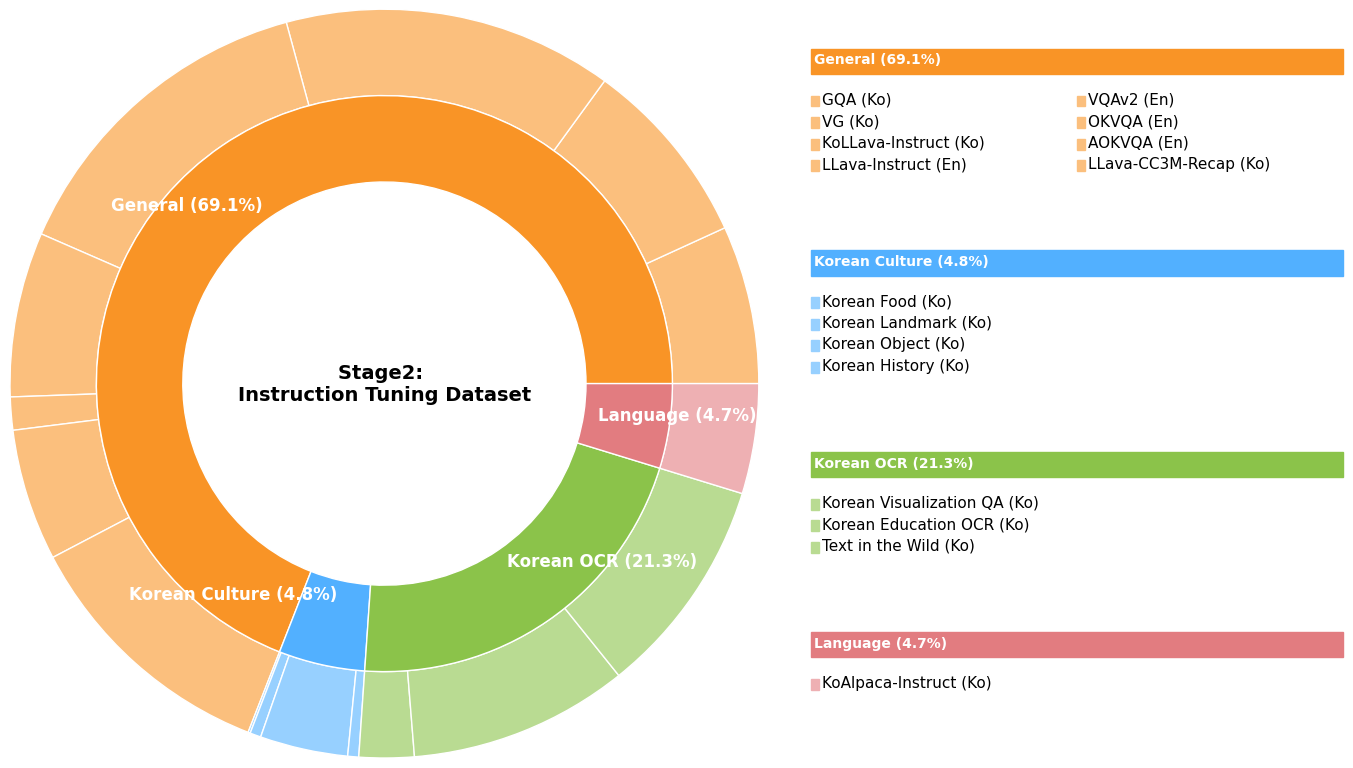

In [50]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys
from matplotlib.patches import Rectangle

# Function to lighten colors for legend bullets
def lighten_color(color, amount=0.6):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = mcolors.to_rgb(c)
    h, l, s = colorsys.rgb_to_hls(*c)
    l = 1 - amount * (1 - l)
    return colorsys.hls_to_rgb(h, l, s)

# Updated dataset definitions (in K)
dataset_info = {
    'General': {
        'GQA (Ko)': 72, 'VG (Ko)': 86, 'KoLLava-Instruct (Ko)': 150,
        'LLava-Instruct (En)': 150, 'VQAv2 (En)': 75, 'OKVQA (En)': 15,
        'AOKVQA (En)': 60, 'LLava-CC3M-Recap (Ko)': 120
    },
    'Korean Culture': {
        'Korean Food (Ko)': 1, 'Korean Landmark (Ko)': 5,
        'Korean Object (Ko)': 40, 'Korean History (Ko)': 5
    },
    'Korean OCR': {
        'Korean Visualization QA (Ko)': 25,
        'Korean Education OCR (Ko)': 100,
        'Text in the Wild (Ko)': 100
    },
    'Language': {
        'KoAlpaca-Instruct (Ko)': 50
    }
}

category_colors = {
    'General': '#f99426',
    'Korean Culture': '#52b0ff',
    'Korean OCR': '#8bc34a',
    'Language': '#e27c80'
}

# Create figure and donut axes
fig = plt.figure(figsize=(14, 8))
donut_ax = fig.add_axes([0.02, 0.05, 0.55, 0.9])
box_areas = [0.25, 0.334, 0.31, 0.26]  # Areas for each super-category box

# Outer ring
outer_sizes = []
outer_colors = []
for cat, d in dataset_info.items():
    base = category_colors[cat]
    for _name, sz in d.items():
        outer_sizes.append(sz)
        outer_colors.append(lighten_color(base))

# Inner ring (categories)
inner_sizes = [sum(d.values()) for d in dataset_info.values()]
inner_colors = [category_colors[c] for c in dataset_info.keys()]

# Draw rings
donut_ax.pie(outer_sizes, radius=1.3, colors=outer_colors,
             wedgeprops=dict(width=0.3, edgecolor='white'))

cat_labels = [f"{c} ({sz/sum(inner_sizes)*100:.1f}%)" 
              for c, sz in zip(dataset_info.keys(), inner_sizes)]

donut_ax.pie(inner_sizes, radius=1.0, colors=inner_colors,
             labels=cat_labels, labeldistance=0.75,
             textprops=dict(color='white', weight='bold', fontsize=12),
             wedgeprops=dict(width=0.3, edgecolor='white'))

donut_ax.text(0, 0, "Stage2: \nInstruction Tuning Dataset", ha='center', va='center',
              fontsize=14, weight='bold',)
donut_ax.set(aspect='equal')

# ------ Legend panel ------
legend_ax = fig.add_axes([0.60, 0.05, 0.38, 0.9])
legend_ax.axis('off')

total = sum(inner_sizes)
y = 0.96  # start at top of legend_ax

for i, (cat, items) in enumerate(dataset_info.items()):
    pct = sum(items.values()) / total * 100
    box_area = box_areas[i]
    legend_ax.add_patch(Rectangle((0, y-0.03), 1, 0.035, transform=legend_ax.transAxes,
                                 color=category_colors[cat], clip_on=False))
    legend_ax.text(0.005, y-0.01, f"{cat} ({pct:.1f}%)", transform=legend_ax.transAxes,
                   va='center', ha='left', color='white', weight='bold', fontsize=10)
    
    entries = list(items.items())
    n = len(entries)
    ncols = min(4, (n // 7) + 1)
    rows = (n + ncols - 1) // ncols
    xs = [i/ncols for i in range(ncols)]
    for i, (name, sz) in enumerate(entries):
        col = i // rows
        row = i % rows
        x = xs[col]
        y_item = y - 0.06 - row*0.03
        legend_ax.add_patch(Rectangle((x, y_item-0.015), 0.015, 0.015, transform=legend_ax.transAxes,
                                     color=lighten_color(category_colors[cat]), clip_on=False))
        legend_ax.text(x+0.02, y_item-0.005, f"{name}", transform=legend_ax.transAxes,
                       va='center', ha='left', fontsize=11)
    y = y - 0.06 - rows*0.03 - 0.1
    #legend_ax.hlines(y+0.015, xmin=0, xmax=1, transform=legend_ax.transAxes,
    #                 color='black', linewidth=1)

plt.tight_layout()
plt.show()
